## plot-idealized-seaice-ocean-model-2020

This code plots output from the code idealized-seaice-ocean-model-2020.ipynb. If no climate forcing is input (F=0), the code produces a plot similar to the top row of Figure 2 in Beer, Eisenman, and Wagner (2020; see reference).

E. Beer, I. Eisenman, and T.J.W. Wagner (2020). Polar amplification due to enhanced heat flux across the halocline. Geophys Res Lett.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
# import model functions
%run idealized-seaice-ocean-model-2020.ipynb

In [3]:
# Run model code
F = 0 # default climate forcing
t, E0, Ed0, T0, Td0, Fb0, Fb1000, _ = sea_ice_EBM_deep_BEW20(F) #output variables needed 

Year 50 complete
Year 100 complete
Year 150 complete
Year 200 complete
Year 250 complete
Year 300 complete
Year 350 complete
Year 400 complete
Year 450 complete
Year 500 complete


Text(0.5, 1.0, 'Ice Thickness')

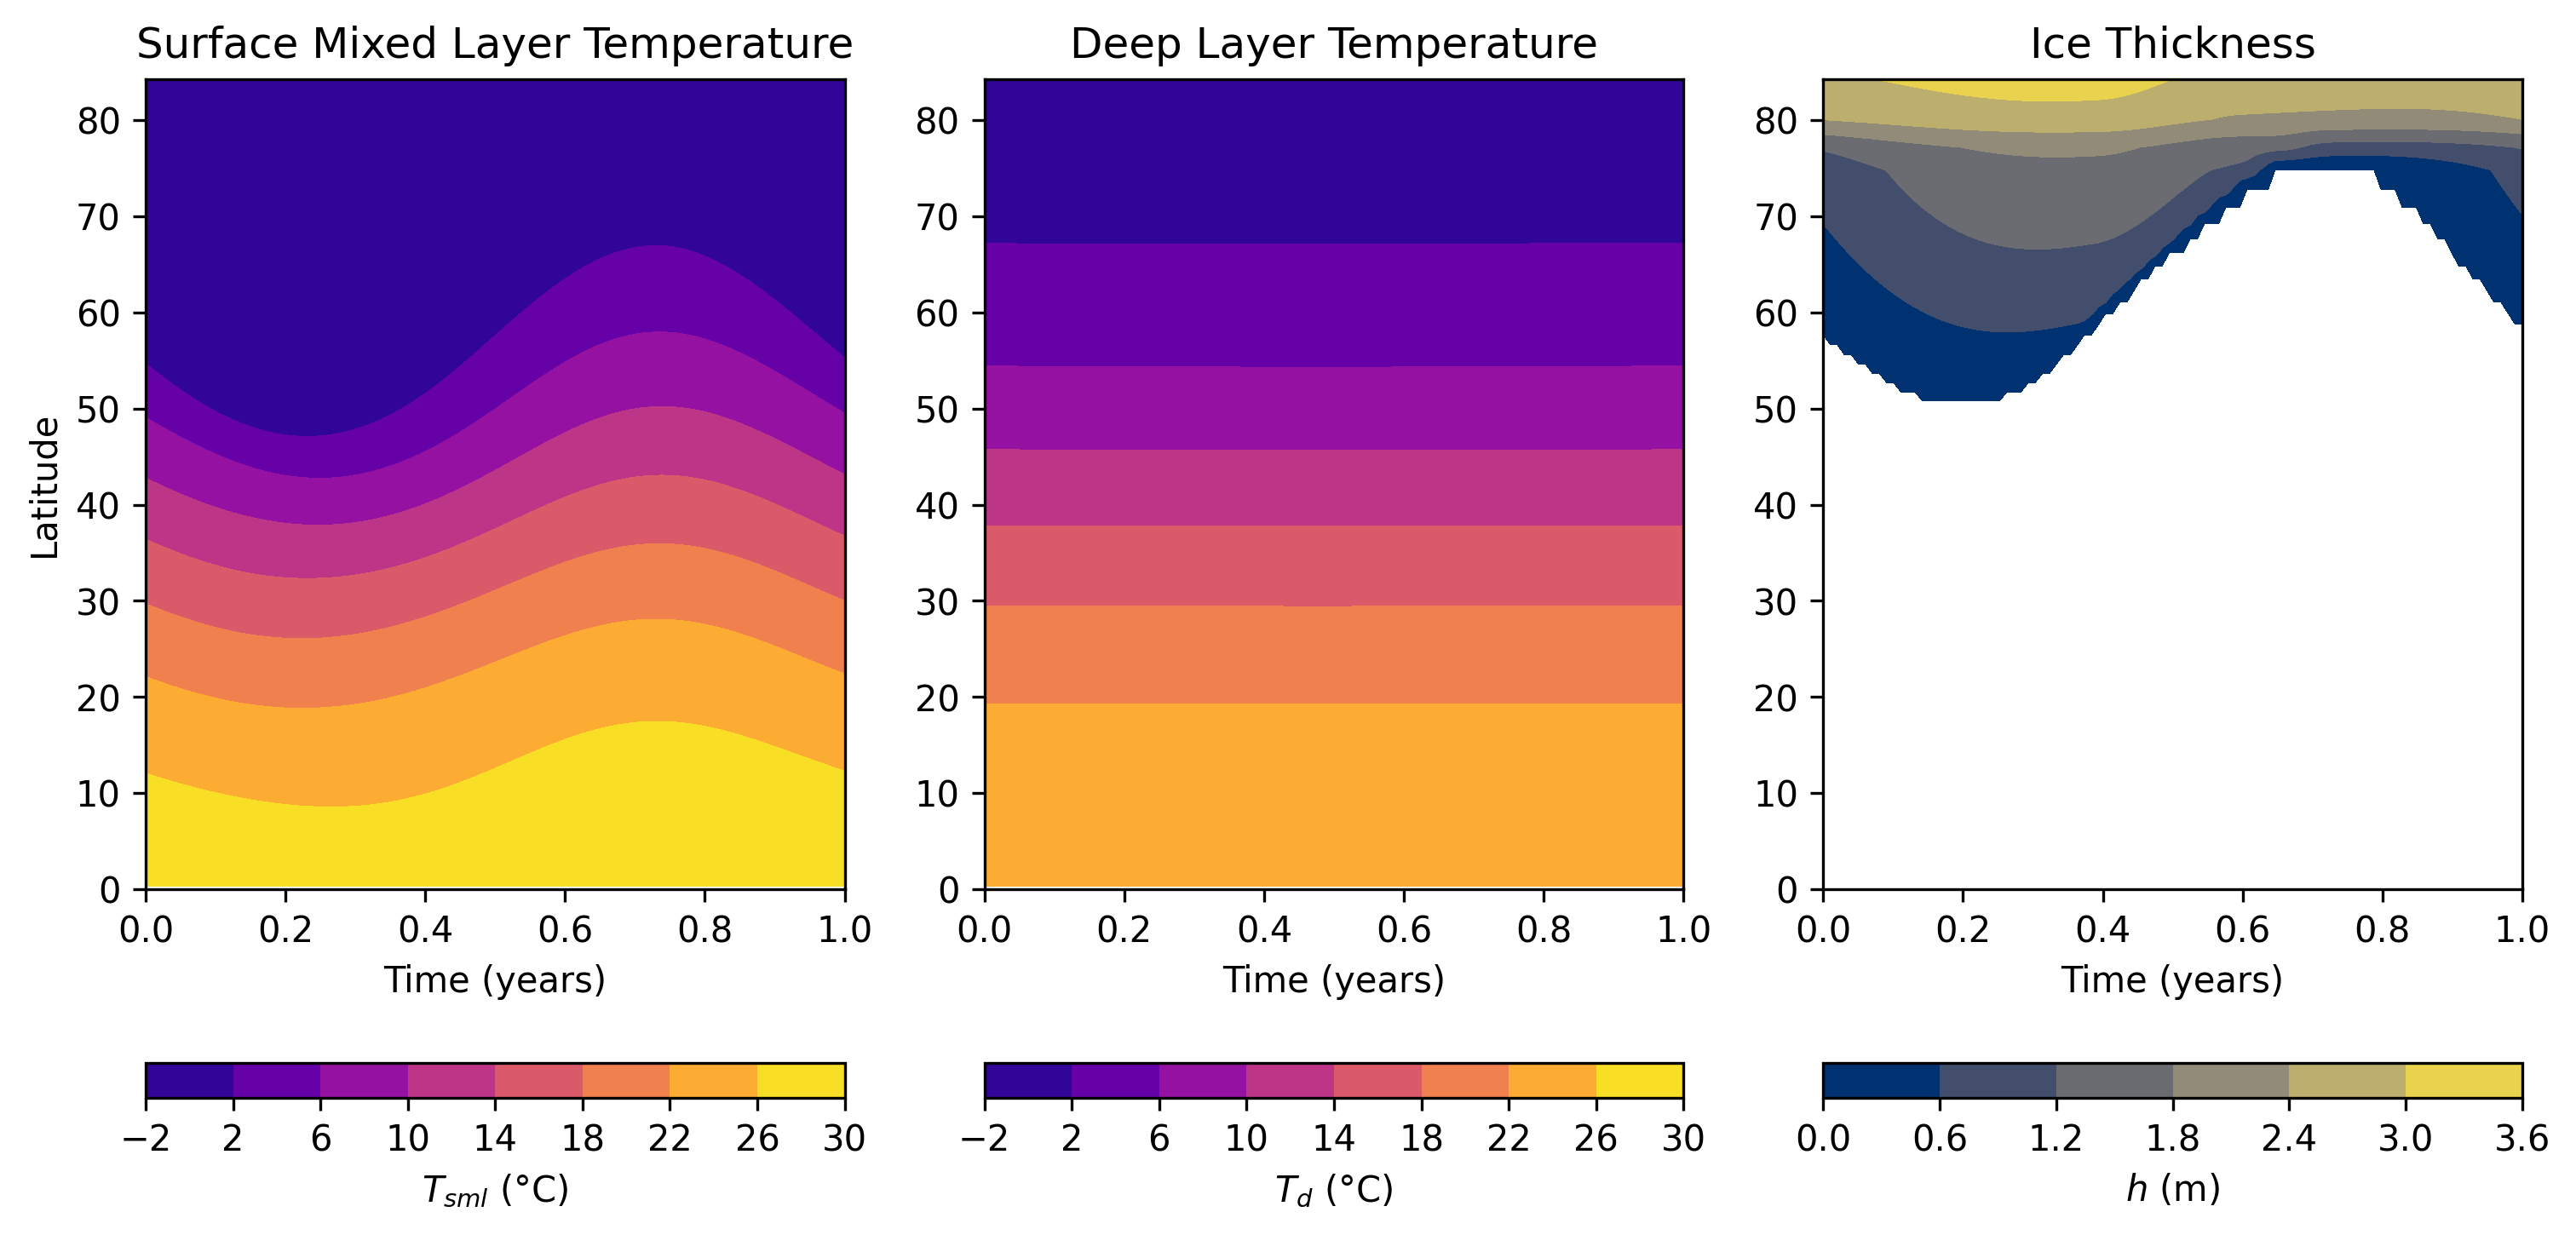

In [4]:
# Define parameters
x = np.arange(1/200, 1, 1/100)
lat = np.degrees(np.arcsin(x))  # latitude N
Lf = 9.5  # sea ice latent heat of fusion (W yr m^-3)

# Calculate surface mixed layer temperature (Tsml)
Tsml = T0.copy()
Tsml[Tsml < -2] = -2

# Plot surface mixed layer temperature (Fig. 2a)
fig = plt.figure(figsize=(12,6))
plt.subplot(131)
clevs = np.arange(-2, 32, 4)
colorvec = (-2, 30)
contourf = plt.contourf(t, lat, Tsml, levels=clevs, cmap = 'plasma')
cbar = plt.colorbar(orientation='horizontal',label='$T_{sml}$ (°C)')
plt.clim(-2,30)
plt.xlabel('Time (years)')
plt.ylabel('Latitude')
plt.ylim([0, lat[-1]])
plt.title('Surface Mixed Layer Temperature')

# Plot deep layer temperature (Fig. 2b)
plt.subplot(132)
contourf = plt.contourf(t, lat, Td0, levels=clevs, cmap = 'plasma')
cbar = plt.colorbar(orientation='horizontal',label='$T_d$ (°C)')
plt.clim(-2,30)
plt.xlabel('Time (years)')
plt.ylim([0, lat[-1]])
plt.title('Deep Layer Temperature')

# Calculate ice thickness using surface enthalpy
hfin = -(E0/Lf)*(E0<0)

# Plot ice thickness (Fig. 2c)
plt.subplot(133)
clevsice = np.arange(0.0001, 4, 0.6)
contourf = plt.contourf(t, lat, hfin, levels=clevsice, cmap = 'cividis')
cbar = plt.colorbar(orientation='horizontal',label='$h$ (m)')
plt.clim(0,3.6)
plt.xlabel('Time (years)')
plt.ylim([0, lat[-1]])
plt.title('Ice Thickness')